In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import regression


Using TensorFlow backend.


# Load data

In [2]:
# load main regression data 
f_path = 'r_data_1B.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [3]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'r_testdata_1B.h5'
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

C:\Users\Ruining\.conda\envs\machine_learning\lib\site-packages\pandas\core\generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167

In [4]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

# Train

In [5]:
# Check model performance accuracy before
model = load_model("regression0.h5")

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
492/492 [==============================] - 2s 5ms/step


In [6]:
print(pre_score)

[44.00430846795803, 2738.1267764704016, 44.00430846795803]


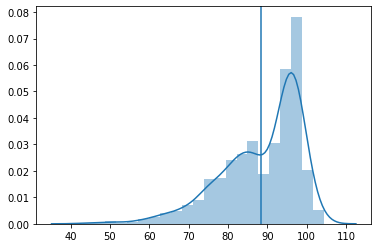

Mean %difference: 88.49792062010364
Standard deviation of %difference: 10.102828318388068


In [7]:
# predict before training
preds_bf = model.predict(X_test)
 
# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
diff_bf = preds_bf.flatten() - y_test.flatten()
percentDiff_bf = (diff_bf / y_test.flatten()) * 100
absPercentDiff_bf = np.abs(percentDiff_bf)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean_bf = np.mean(absPercentDiff_bf)
std_bf = np.std(absPercentDiff_bf)

sns.distplot(absPercentDiff_bf)
plt.axvline(mean_bf, 0,1)
plt.show()

print("Mean %difference:",mean_bf)
print("Standard deviation of %difference:",std_bf)

In [8]:
epoch = 200
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='mean_squared_error',verbose=1,min_delta=0.5,patience=40,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Instructions for updating:
Use tf.cast instead.
Train on 3537 samples, validate on 885 samples
Epoch 1/200
3537/3537 [==============================] - 6s 2ms/step - loss: 10.5326 - mean_squared_error: 260.6878 - mean_absolute_error: 10.5326 - val_loss: 9.2307 - val_mean_squared_error: 190.4864 - val_mean_absolute_error: 9.2307
Epoch 2/200
3537/3537 [==============================] - 6s 2ms/step - loss: 8.6795 - mean_squared_error: 175.0427 - mean_absolute_error: 8.6795 - val_loss: 8.5441 - val_mean_squared_error: 167.1445 - val_mean_absolute_error: 8.5441
Epoch 3/200
3537/3537 [==============================] - 6s 2ms/step - loss: 8.0534 - mean_squared_error: 153.8879 - mean_absolute_error: 8.0534 - val_loss: 7.8974 - val_mean_squared_error: 143.0256 - val_mean_absolute_error: 7.8974
Epoch 4/200
3537/3537 [==============================] - 6s 2ms/step - loss: 6.5999 - mean_squared_error: 108.6786 - mean_absolute_error: 6.5999 - val_loss: 5.8796 - val_mean_squared_error: 79.9449 - val_

3537/3537 [==============================] - 30s 9ms/step - loss: 0.9851 - mean_squared_error: 2.0789 - mean_absolute_error: 0.9851 - val_loss: 1.2317 - val_mean_squared_error: 3.9491 - val_mean_absolute_error: 1.2317
Epoch 36/200
3537/3537 [==============================] - 30s 9ms/step - loss: 1.0097 - mean_squared_error: 2.2588 - mean_absolute_error: 1.0097 - val_loss: 1.6079 - val_mean_squared_error: 7.0879 - val_mean_absolute_error: 1.6079
Epoch 37/200
3537/3537 [==============================] - 30s 9ms/step - loss: 0.9784 - mean_squared_error: 2.0502 - mean_absolute_error: 0.9784 - val_loss: 1.3072 - val_mean_squared_error: 4.1970 - val_mean_absolute_error: 1.3072
Epoch 38/200
3537/3537 [==============================] - 30s 9ms/step - loss: 0.9404 - mean_squared_error: 1.8788 - mean_absolute_error: 0.9404 - val_loss: 1.2694 - val_mean_squared_error: 4.2522 - val_mean_absolute_error: 1.2694
Epoch 39/200
3537/3537 [==============================] - 30s 9ms/step - loss: 0.9040 - m

3537/3537 [==============================] - 30s 8ms/step - loss: 0.5516 - mean_squared_error: 0.6401 - mean_absolute_error: 0.5516 - val_loss: 1.1449 - val_mean_squared_error: 3.3325 - val_mean_absolute_error: 1.1449
Epoch 106/200
3537/3537 [==============================] - 30s 8ms/step - loss: 0.5524 - mean_squared_error: 0.6459 - mean_absolute_error: 0.5524 - val_loss: 0.9917 - val_mean_squared_error: 2.8267 - val_mean_absolute_error: 0.9917
Epoch 107/200
3537/3537 [==============================] - 31s 9ms/step - loss: 0.5735 - mean_squared_error: 0.6883 - mean_absolute_error: 0.5735 - val_loss: 1.1002 - val_mean_squared_error: 2.9801 - val_mean_absolute_error: 1.1002
Epoch 108/200
3537/3537 [==============================] - 30s 9ms/step - loss: 0.5511 - mean_squared_error: 0.6251 - mean_absolute_error: 0.5511 - val_loss: 1.1017 - val_mean_squared_error: 3.2617 - val_mean_absolute_error: 1.1017
Epoch 00108: early stopping


# Training history

In [9]:
# evaluate after training
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

492/492 [==============================] - 1s 1ms/step
[1.1799637273075134, 4.167841989335006, 1.1799637273075134]


dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


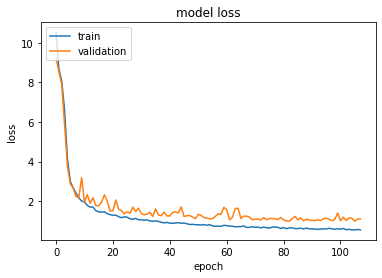

In [10]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Histograms

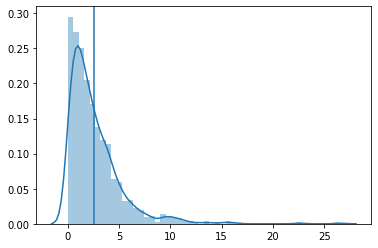

Mean %difference: 2.59625444809693
Standard deviation of %difference: 2.5972260679626005


In [11]:
# histogram for both m1,m2

preds = model.predict(X_test)
 
# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
diff = preds.flatten() - y_test.flatten()
percentDiff = (diff / y_test.flatten()) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

sns.distplot(absPercentDiff)
plt.axvline(mean, 0,1)
plt.show()

print("Mean %difference:",mean)
print("Standard deviation of %difference:",std)

In [12]:
# Transfer m1,m2 to chirp mass and eta for y_test

M_actual = []
eta_actual = []

for p in y_test:
    m1 = p[0]
    m2 = p[1]
    M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    M_actual.append(M)
    e = (m1*m2)/(m1+m2)**2
    eta_actual.append(e)

M_actual = np.asarray(M_actual)
eta_actual = np.asarray(eta_actual)   
    
# Transfer m1,m2 to chirp mass and eta for prediction
M_preds = []
eta_preds = []
for p in preds:
    m1 = p[0]
    m2 = p[1]
    M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    M_preds.append(M)
    e = (m1*m2)/(m1+m2)**2
    eta_preds.append(e)
    
M_preds = np.asarray(M_preds)
eta_preds = np.asarray(eta_preds)

In [13]:
M_diff = M_preds - M_actual
c = (M_diff / M_actual) * 100
print(c)

[-3.51947345e-01 -7.41527336e-01 -8.69558509e-01  5.32268857e-01
 -4.69691120e+00 -1.20856996e+00  1.50794857e+00 -2.07864366e+00
 -1.11902507e+00  3.13564368e+00 -2.02164341e+00 -2.58521731e+00
  6.52483444e-01 -2.33320582e+00 -2.14466674e+00 -1.68500151e+00
  1.36629614e+00  2.85250695e-01 -3.08721824e+00 -1.05178922e+00
 -4.69854337e-01  1.25982358e+00 -1.48462542e-02 -1.16745178e+00
 -4.35436217e+00 -2.12531909e+00 -5.71912551e-01 -1.87104645e+00
 -1.14726631e+00 -1.63218389e+01 -5.92622822e-01  7.14899243e-01
 -1.42570307e+00  2.26391480e+00 -3.45042087e+00  6.20488322e-01
 -5.08600584e-02 -6.54044590e-02 -1.37057961e+00 -2.08811143e-02
 -8.98148931e-01 -6.44914316e-01  1.33452264e+00 -2.36208165e-01
 -1.11463320e+00  1.01107007e+00 -3.21266778e+00 -1.05352510e+00
 -2.48007529e+00 -2.29557022e+00 -9.97862692e-01 -1.85866551e+00
  2.68306842e+00  2.84310867e-01  1.25259287e-01 -1.15985904e+00
 -1.94586110e+00 -1.67286209e+00 -2.28321769e+00  5.11586751e-01
 -3.64019473e-02 -1.67331

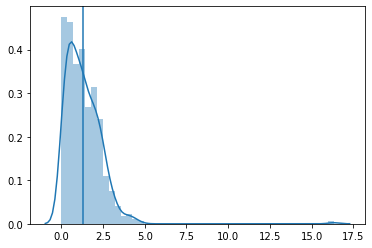

Mean %difference: 1.3281449538867163
Standard deviation of %difference: 1.1487631221490935


In [14]:
# Chirp mass histogram

# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
M_diff = M_preds - M_actual
M_percentDiff = (M_diff / M_actual) * 100
M_absPercentDiff = np.abs(M_percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
M_mean = np.mean(M_absPercentDiff)
M_std = np.std(M_absPercentDiff)

sns.distplot(M_absPercentDiff)
plt.axvline(M_mean, 0,1)
plt.show()

print("Mean %difference:",M_mean)
print("Standard deviation of %difference:",M_std)

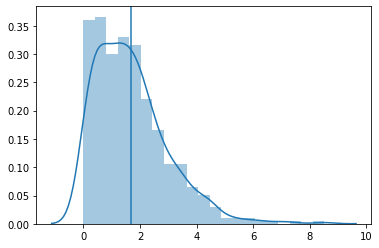

Mean %difference: 1.6861703001584716
Standard deviation of %difference: 1.2883390673888622


In [15]:
# Eta histogram

# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
eta_diff = eta_preds - eta_actual
eta_percentDiff = (eta_diff / eta_actual) * 100
eta_absPercentDiff = np.abs(eta_percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
eta_mean = np.mean(eta_absPercentDiff)
eta_std = np.std(eta_absPercentDiff)

sns.distplot(eta_absPercentDiff)
plt.axvline(eta_mean, 0,1)
plt.show()

print("Mean %difference:",eta_mean)
print("Standard deviation of %difference:",eta_std)

# Select cases that have a larger percentage difference in chirp mass 

In [16]:
count = 0
percentage_cut = 2

percent = []
badmass = []

for i in np.arange(len(M_absPercentDiff)):
    if M_absPercentDiff[i] > percentage_cut:
        count += 1
        badmass.append(y_test[i])
        percent.append(M_absPercentDiff[i])
        print()
        print("Absolute Percent Difference for chirp mass: ",M_absPercentDiff[i])
        print("Actual masses: ",y_test[i])
        print("Predicted masses: ",preds[i])

print()
print("A total number of ", count, " predictions have above ", percentage_cut, " absolute percent difference.")


Absolute Percent Difference for chirp mass:  4.696911201813816
Actual masses:  [21.05455941 90.56023725]
Predicted masses:  [19.056543 92.265015]

Absolute Percent Difference for chirp mass:  2.0786436601063163
Actual masses:  [14.79625502 47.81426215]
Predicted masses:  [14.241105 47.83123 ]

Absolute Percent Difference for chirp mass:  3.1356436827613874
Actual masses:  [36.59896782 51.85992631]
Predicted masses:  [36.52436  55.419056]

Absolute Percent Difference for chirp mass:  2.0216434089161543
Actual masses:  [11.10304749 87.23785419]
Predicted masses:  [10.6564245 87.923225 ]

Absolute Percent Difference for chirp mass:  2.5852173067410287
Actual masses:  [18.41538757 94.41754552]
Predicted masses:  [17.43237  95.513084]

Absolute Percent Difference for chirp mass:  2.3332058237307405
Actual masses:  [14.41782615 53.63658443]
Predicted masses:  [13.831319 53.585316]

Absolute Percent Difference for chirp mass:  2.1446667421121557
Actual masses:  [17.42667588 79.70450588]
Pred

In [17]:
# make panda dataframe
summary = pd.DataFrame(badmass,columns = ["m1","m2"])
summary['percentage'] = percent

Blues = plt.get_cmap('Blues')
norm = [float(i)/max(percent) for i in percent]
colors = [Blues(c) for c in norm]

summary['colors']=colors

# For stage 1B data generation

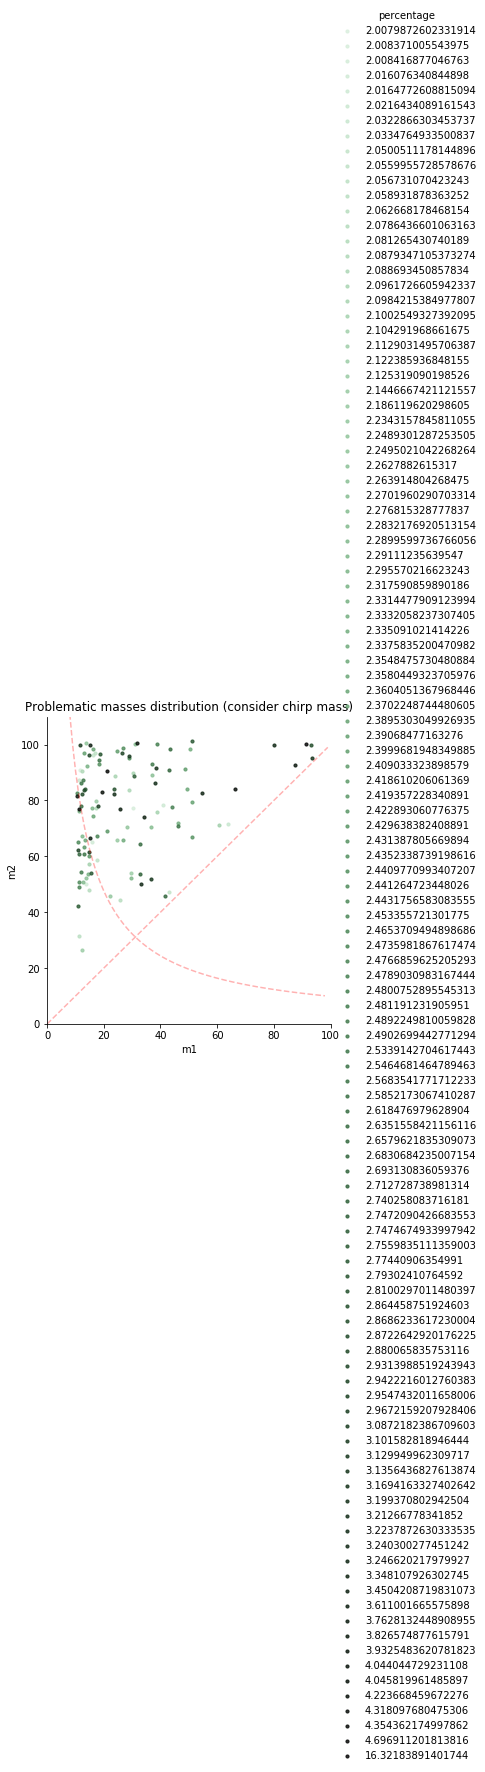

In [18]:
# Summary for training data 1B:

sns.lmplot(x="m1", y="m2",
           hue="percentage",
           data = summary,
           fit_reg=False,
           scatter_kws={"marker": "D",
                        "s": 10},
           palette = sns.cubehelix_palette(len(colors), start=2, rot=0, dark=0, light=.9))

plt.plot(np.arange(100),'r--',alpha=0.3)
plt.plot(1000/np.arange(1,100),'r--',alpha=0.3)

plt.title('Problematic masses distribution (consider chirp mass)')
plt.xlabel('m1')
plt.ylabel('m2')
plt.ylim(0,110)
plt.xlim(0,100)
plt.show()